In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from librosa import display
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow.keras.layers as layers
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras

# DATA VISUALIZATION

In [4]:
import librosa
audio_file_path="D:\\shravanne-tasks\\Akshar audio dataset\\Na\\10.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 127)


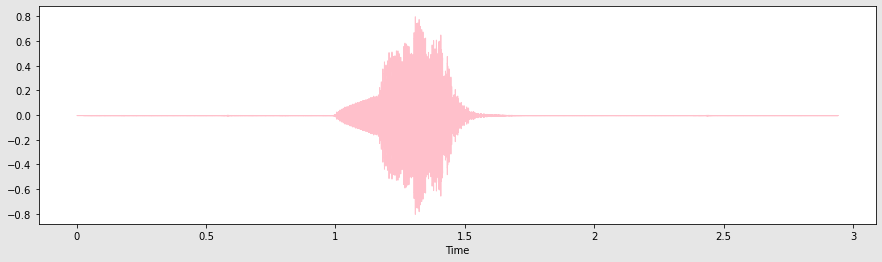

In [6]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate, color='pink')

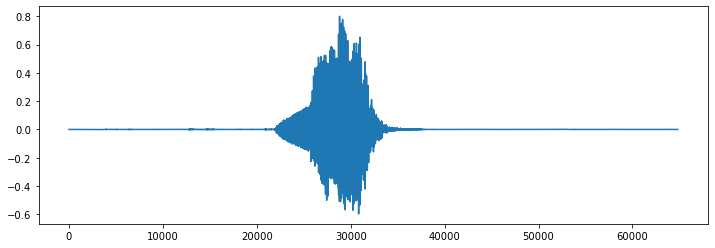

In [8]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [11]:
t = librosa.feature.tonnetz(y=librosa.effects.harmonic(librosa_audio_data),sr=librosa_sample_rate)
m = librosa.feature.melspectrogram(y=librosa_audio_data ,sr=librosa_sample_rate)
s = np.abs(librosa.stft(librosa_audio_data))
c = librosa.feature.chroma_stft(S=s, sr=librosa_sample_rate)

C:\Users\ril\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1013
  return f(*args, **kwargs)


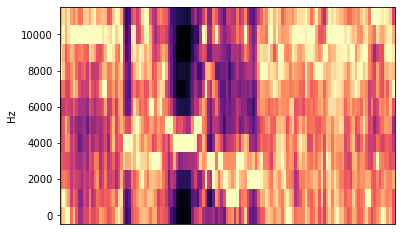

In [12]:
librosa.display.specshow(c, y_axis='linear')

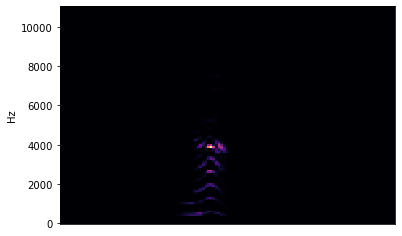

In [14]:
librosa.display.specshow(m, y_axis='linear')

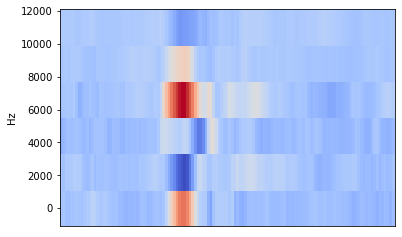

In [13]:
librosa.display.specshow(t, y_axis='linear')

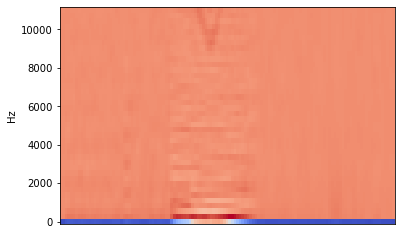

In [7]:
librosa.display.specshow(mfccs, y_axis='linear')

# FEATURE EXTRACTION

In [65]:
import numpy as np
dataset = []
cla=[]
genres = {'Ch': 0, 'Ma': 1, 'Na': 2, 'sa': 3, 'Sh': 4}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'D:\\shravanne-tasks\\Akshar audio dataset\\{genre}'):
        songname = f'D:\\shravanne-tasks\\Akshar audio dataset\\{genre}\\{filename}'
        for index in range(2):
            audio, sr = librosa.load(songname)
            mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
            fea_class=genre
            dataset.append(mfcc_fea)
            cla.append(fea_class)

In [66]:
d = {'Features':dataset,'class':cla}

In [67]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-514.13824, 91.60565, -32.197807, 35.39216, -...",Ch
1,"[-514.13824, 91.60565, -32.197807, 35.39216, -...",Ch
2,"[-512.9067, 107.64262, 1.0998126, 10.621422, 5...",Ch
3,"[-512.9067, 107.64262, 1.0998126, 10.621422, 5...",Ch
4,"[-420.72794, 123.99394, -27.147789, 31.224602,...",Ch


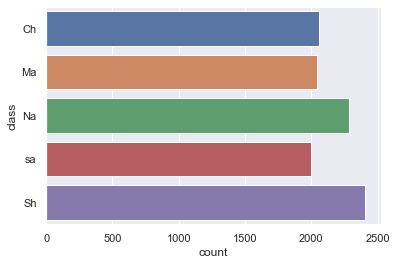

In [68]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(y= extracted_features_df['class'],orient='v')
plt.show()

In [69]:
### Split the dataset into independent and dependent dataset
X=np.array(dataset)
#(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [70]:
X.shape

(10792, 40)

In [71]:
y.shape

(10792,)

In [72]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [73]:
y.shape

(10792, 5)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
X_train.shape

(8633, 40)

In [76]:
X_test.shape

(2159, 40)

In [77]:
y_train.shape

(8633, 5)

In [78]:
y_test.shape

(2159, 5)

In [79]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4,1))
X_test=np.reshape(X_test,(X_test.shape[0],10,4,1))

In [80]:
X_train.shape

(8633, 10, 4, 1)

In [81]:
y_train.shape

(8633, 5)

In [82]:
INPUTSHAPE = (10,4,1)

In [83]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.GlobalAveragePooling2D(),
                          layers.Flatten(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(5 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 2, 32)          320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 68,933
Trainable params: 68,933
Non-trainable params: 0
__________________________________________________

In [84]:
import tensorflow as tf

In [85]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
1080/1080 [==============================] - 20s 8ms/step - loss: 1.4274 - acc: 0.4805 - val_loss: 1.0396 - val_acc: 0.6058
Epoch 2/40
1080/1080 [==============================] - 3s 3ms/step - loss: 0.8773 - acc: 0.6623 - val_loss: 0.6944 - val_acc: 0.7503
Epoch 3/40
1080/1080 [==============================] - 3s 3ms/step - loss: 0.6871 - acc: 0.7434 - val_loss: 0.6477 - val_acc: 0.7564
Epoch 4/40
1080/1080 [==============================] - 3s 3ms/step - loss: 0.5520 - acc: 0.8020 - val_loss: 0.5571 - val_acc: 0.7957
Epoch 5/40
1080/1080 [==============================] - 3s 2ms/step - loss: 0.4631 - acc: 0.8361 - val_loss: 0.5029 - val_acc: 0.8189
Epoch 6/40
1080/1080 [==============================] - 3s 2ms/step - loss: 0.3901 - acc: 0.8619 - val_loss: 0.4293 - val_acc: 0.8462
Epoch 7/40
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3255 - acc: 0.8890 - val_loss: 0.4651 - val_acc: 0.8434
Epoch 8/40
1080/1080 [==============================] - 2s 2m

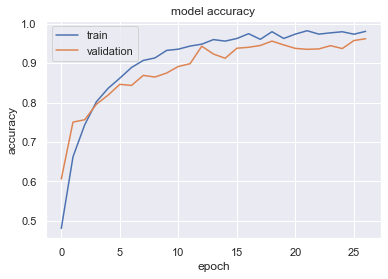

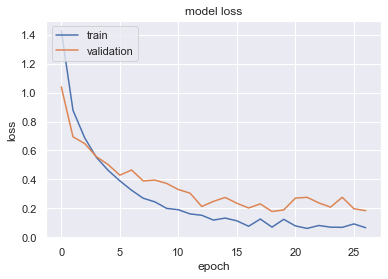

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [87]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9620194435119629


In [88]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [89]:
y_pred=model.predict(X_test)

68/68 [==============================] - 0s 1ms/step


In [90]:
round_off=np.round_(y_pred)

Confusion Matrix
[[388   2   6  12   0]
 [ 12 388  10   3   2]
 [  3   4 464   3   0]
 [  4   1   3 476   3]
 [  7   1   5   3 359]]


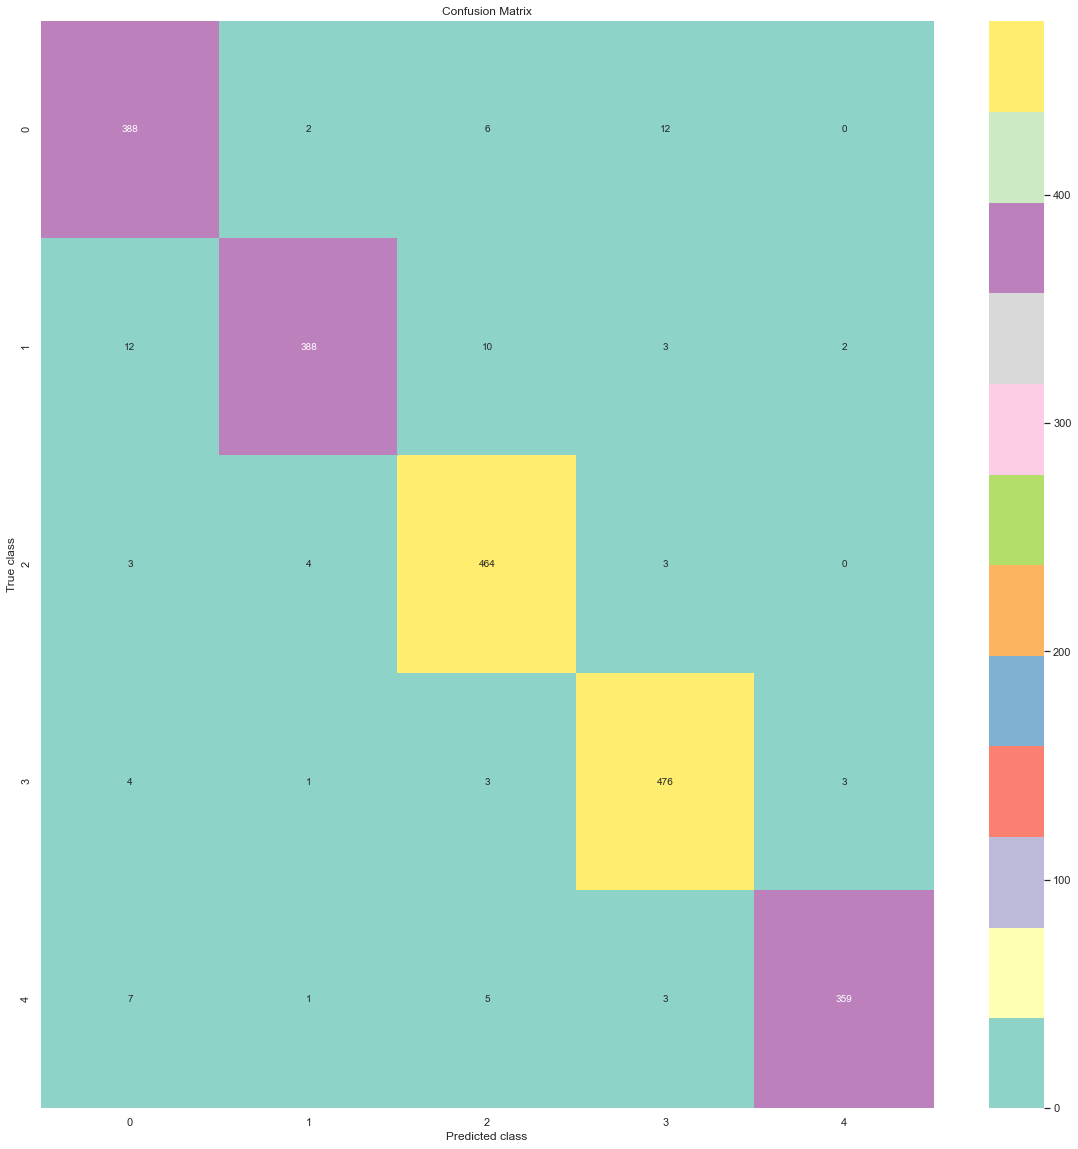

In [91]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [103]:
mydict ={'Ch': 0, 'Ma': 1, 'Na': 2, 'Sh': 3, 'sa': 4}
import librosa
audio_file_path="C:\\Users\\ril\\Downloads\\na_100.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4,1))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 0s 24ms/step
Na


In [104]:
model.save("D:\\shravanne-tasks\\Akshar_model.h5")
print("Saved model to disk")

Saved model to disk


In [105]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('D:\\shravanne-tasks\\Akshar_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ril\AppData\Local\Temp\tmpauqef508\assets


INFO:tensorflow:Assets written to: C:\Users\ril\AppData\Local\Temp\tmpauqef508\assets
